In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Description the data
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


# Models used in this notebook

* K-NN model
* Naive Bayes model
* SVM Model
* Decision Tree Model
* Logistic Regression
* RidgeClassifier Model
* Random Forest Classifier
* XGBoost Classifier

# Import Libraries

In [2]:
# For data split
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# To evaluation the final model
from sklearn.metrics import confusion_matrix,classification_report

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data

In [3]:
# read the data
diabetes_data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# shape of data
diabetes_data.shape

(768, 9)

# Missing Values and data type check

In [5]:
# check for the missing values
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# check for the missing values and data type in one step

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Great !

*No missing values and all data type are numerical without any categorical variables*

# Data visualization

In [7]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


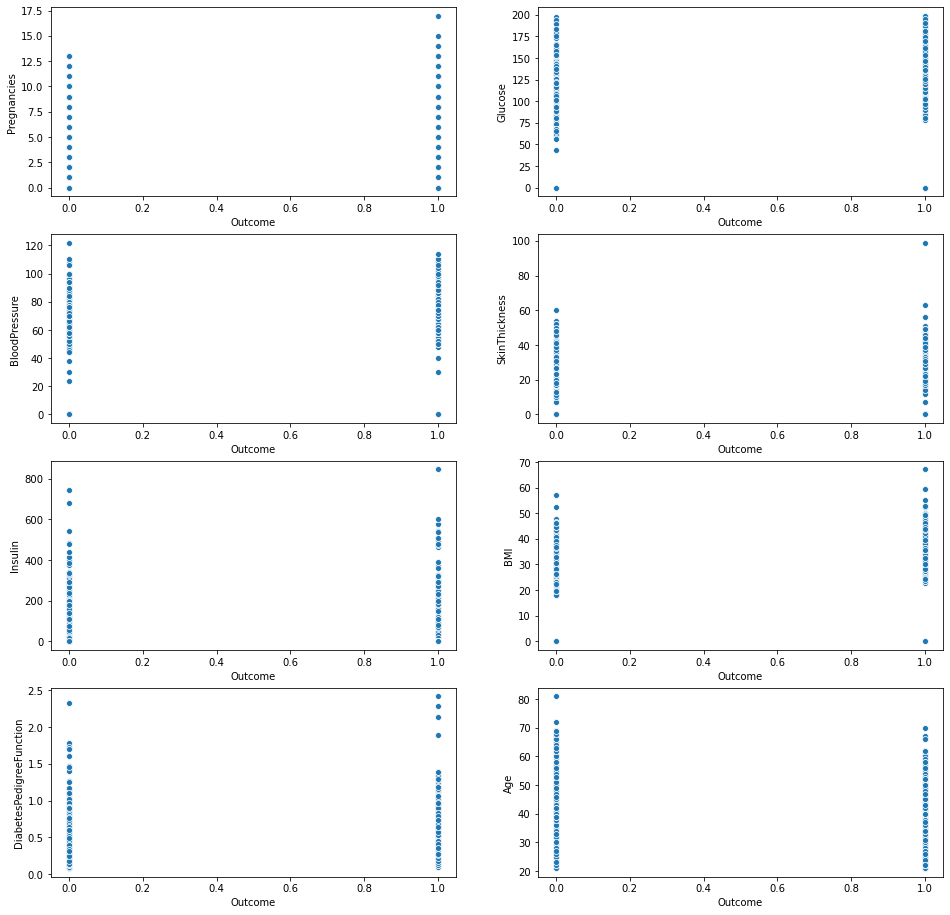

In [8]:
feature_name = [name for name in diabetes_data.columns.values]
plt.figure(figsize=(16,16))
for i,name in enumerate(diabetes_data.columns.values[:-1]):
    ax = plt.subplot((len (feature_name)-1)/2, 2, i + 1)
    sns.scatterplot(y=diabetes_data[name], x=diabetes_data[diabetes_data.columns.values[-1]])
    plt.ylabel(feature_name[i])
    plt.xlabel(feature_name[-1])


# Select the features and Target

Data Split to train and test datasets

In [9]:
X = diabetes_data.drop(['Outcome'],axis=1)
y = diabetes_data['Outcome']

In [10]:
# split the data to train and test or train and test and vaildation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


### K-NN Model

In [11]:
KNeighborsClassifierModel = KNeighborsClassifier(n_neighbors=2)

# train the model
KNeighborsClassifierModel.fit(X_train,y_train)

print ('The train score: ',KNeighborsClassifierModel.score(X_train,y_train))
print ('The test score: ',KNeighborsClassifierModel.score(X_test,y_test))

The train score:  0.8361266294227188
The test score:  0.683982683982684


### Naive Bayes (GaussianNB) Model

In [12]:
GaussianNBModel = GaussianNB()

# train the model
GaussianNBModel.fit(X_train,y_train)

print ('The train score: ',GaussianNBModel.score(X_train,y_train))
print ('The test score: ',GaussianNBModel.score(X_test,y_test))

The train score:  0.7653631284916201
The test score:  0.7748917748917749


### SVC Model

In [13]:
SVCModel = SVC()

# train the model
SVCModel.fit(X_train,y_train)

print ('The train score: ',SVCModel.score(X_train,y_train))
print ('The test score: ',SVCModel.score(X_test,y_test))

The train score:  0.7802607076350093
The test score:  0.7359307359307359


### DecisionTreeClassifier Model

In [14]:
# Descion tree model

DecisionTreeClassifierModel = DecisionTreeClassifier()

# train the model
DecisionTreeClassifierModel.fit(X_train,y_train)

print ('The train score: ',DecisionTreeClassifierModel.score(X_train,y_train))
print ('The test score: ',DecisionTreeClassifierModel.score(X_test,y_test))

The train score:  1.0
The test score:  0.70995670995671


The test score is less than the train score, which is means ***overfit***

### Logistic regression Model

In [15]:
# Logistic regression

LogisticRegressionModel = LogisticRegression(max_iter=1000)
LogisticRegressionModel.fit(X_train,y_train)
print ('the train score: ',LogisticRegressionModel.score(X_train,y_train))
print ('the test score: ',LogisticRegressionModel.score(X_test,y_test))

the train score:  0.7821229050279329
the test score:  0.7705627705627706


In [16]:
RidgeClassifierModel = RidgeClassifier()
RidgeClassifierModel.fit(X_train,y_train)
print ('the train score: ',RidgeClassifierModel.score(X_train,y_train))
print ('the test score: ',RidgeClassifierModel.score(X_test,y_test))

the train score:  0.7877094972067039
the test score:  0.7532467532467533



### Random Forest Classifier Model

In [17]:
RandomForestClassifierModel = RandomForestClassifier()
RandomForestClassifierModel.fit(X_train,y_train)

print ('Train Score: ',RandomForestClassifierModel.score(X_train,y_train))
print ('Test Score: ',RandomForestClassifierModel.score(X_test,y_test))

Train Score:  1.0
Test Score:  0.7445887445887446


### XGBoosting Classifier Model

In [18]:
XGBClassifierModel = XGBClassifier()
XGBClassifierModel.fit(X_train,y_train)

print ('Train Score: ',XGBClassifierModel.score(X_train,y_train))
print ('Test Score: ',XGBClassifierModel.score(X_test,y_test))

Train Score:  1.0
Test Score:  0.7229437229437229


### Final Model

In [19]:
Final_Model = RandomForestClassifier()
Final_Model.fit(X_train,y_train)

print ('Train Score: ',Final_Model.score(X_train,y_train))
print ('Test Score: ',Final_Model.score(X_test,y_test))

Train Score:  1.0
Test Score:  0.7445887445887446


### Predicitons

In [20]:
predicitons = Final_Model.predict(X_test)
print ('The Last 10 True Outcome: ',y_test[-10:].values)
print ('The Last 10 Predicted Outcome: ',predicitons[-10:])

The Last 10 True Outcome:  [1 1 0 0 0 0 0 1 1 0]
The Last 10 Predicted Outcome:  [0 0 0 0 1 0 1 0 1 0]


### Model Evaluation

In [21]:
print (classification_report(y_test,predicitons))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       137
           1       0.73      0.59      0.65        94

    accuracy                           0.74       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [22]:
CM = confusion_matrix(y_test,predicitons)
CM

array([[117,  20],
       [ 39,  55]])